### 1. Recolección de datos

In [1]:
# Descarga de dataset a utilizar 

import wget

url = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2023.csv"
filename = wget.download(url)

100% [............................................................................] 623845 / 623845

In [2]:
filename

'atp_matches_2023.csv'

### 2. Exploración de datos

In [3]:
# Lectura de dataset

import pandas as pd

data = pd.read_csv('atp_matches_2023.csv')

# Estadísticas descriptivas
print(data.describe())

         draw_size  tourney_date   match_num      winner_id  winner_seed  \
count  2986.000000  2.986000e+03  2986.00000    2986.000000  1250.000000   
mean     64.901541  2.023057e+07   235.88781  145036.088078     7.821600   
std      46.314680  3.058956e+02    82.33363   42766.699797     7.204728   
min       2.000000  2.023010e+07     1.00000  100644.000000     1.000000   
25%      32.000000  2.023031e+07   208.00000  106331.000000     3.000000   
50%      32.000000  2.023053e+07   275.00000  126205.000000     6.000000   
75%     128.000000  2.023082e+07   289.00000  200325.000000    10.000000   
max     128.000000  2.023113e+07   300.00000  212051.000000    32.000000   

         winner_ht   winner_age       loser_id  loser_seed     loser_ht  ...  \
count  2782.000000  2985.000000    2986.000000  769.000000  2650.000000  ...   
mean    187.446441    26.589280  144006.518084    9.690507   186.562264  ...   
std       6.296849     4.350872   42450.867025    8.099507     6.458224  ..

In [4]:
# Estadísticas de la cantidad de Aces del jugador ganador
print(data['w_ace'].describe())

count    2815.000000
mean        6.956306
std         5.033210
min         0.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        42.000000
Name: w_ace, dtype: float64


In [5]:
# Estadísticas del ranking del jugador ganador
print(data['winner_rank'].describe())

count    2964.000000
mean       74.961876
std       116.119939
min         1.000000
25%        17.000000
50%        48.000000
75%        87.000000
max      1594.000000
Name: winner_rank, dtype: float64


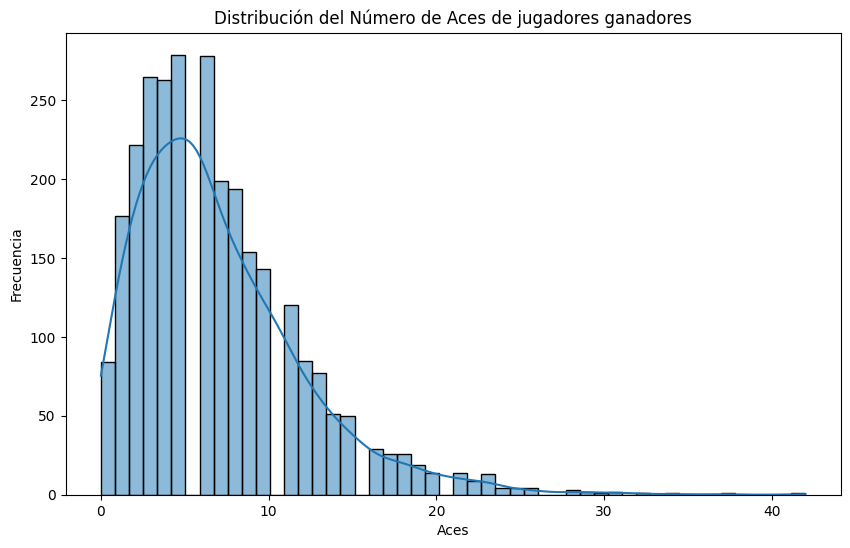

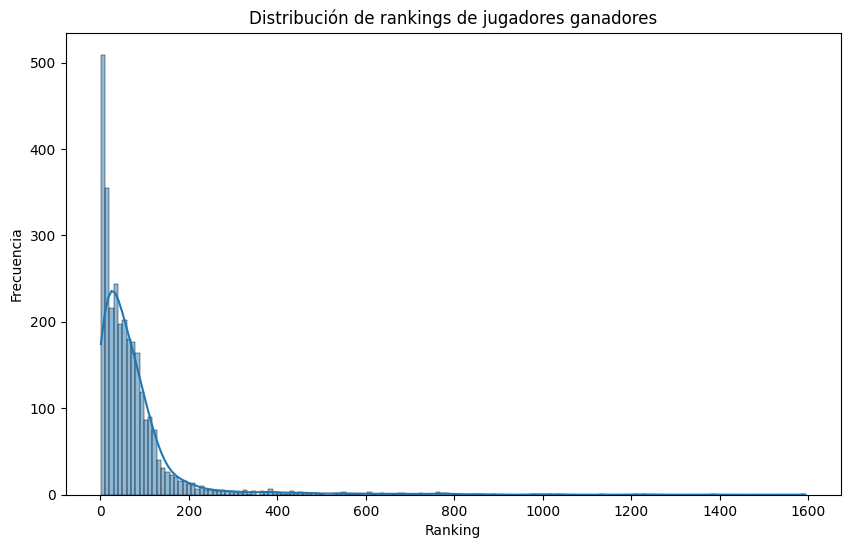

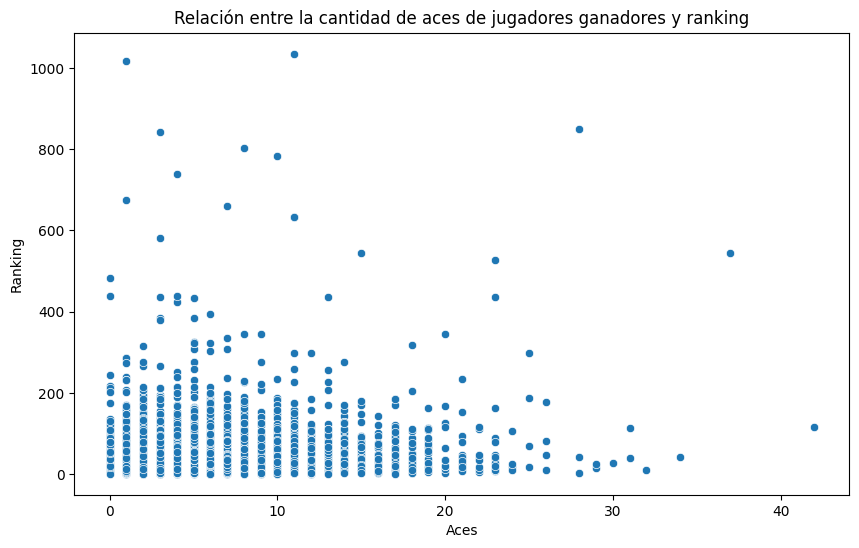

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para la distribución de cantidas de Aces del jugador ganador
plt.figure(figsize=(10, 6))
sns.histplot(data['w_ace'], kde=True)
plt.title('Distribución del Número de Aces de jugadores ganadores')
plt.xlabel('Aces')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para la distribución de ranking de jugador ganador
plt.figure(figsize=(10, 6))
sns.histplot(data['winner_rank'], kde=True)
plt.title('Distribución de rankings de jugadores ganadores')
plt.xlabel('Ranking')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de dispersión para explorar la relación entre las variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='w_ace', y='winner_rank', data=data)
plt.title('Relación entre la cantidad de aces de jugadores ganadores y ranking')
plt.xlabel('Aces')
plt.ylabel('Ranking')
plt.show()

### 3. Relaciones entre datos

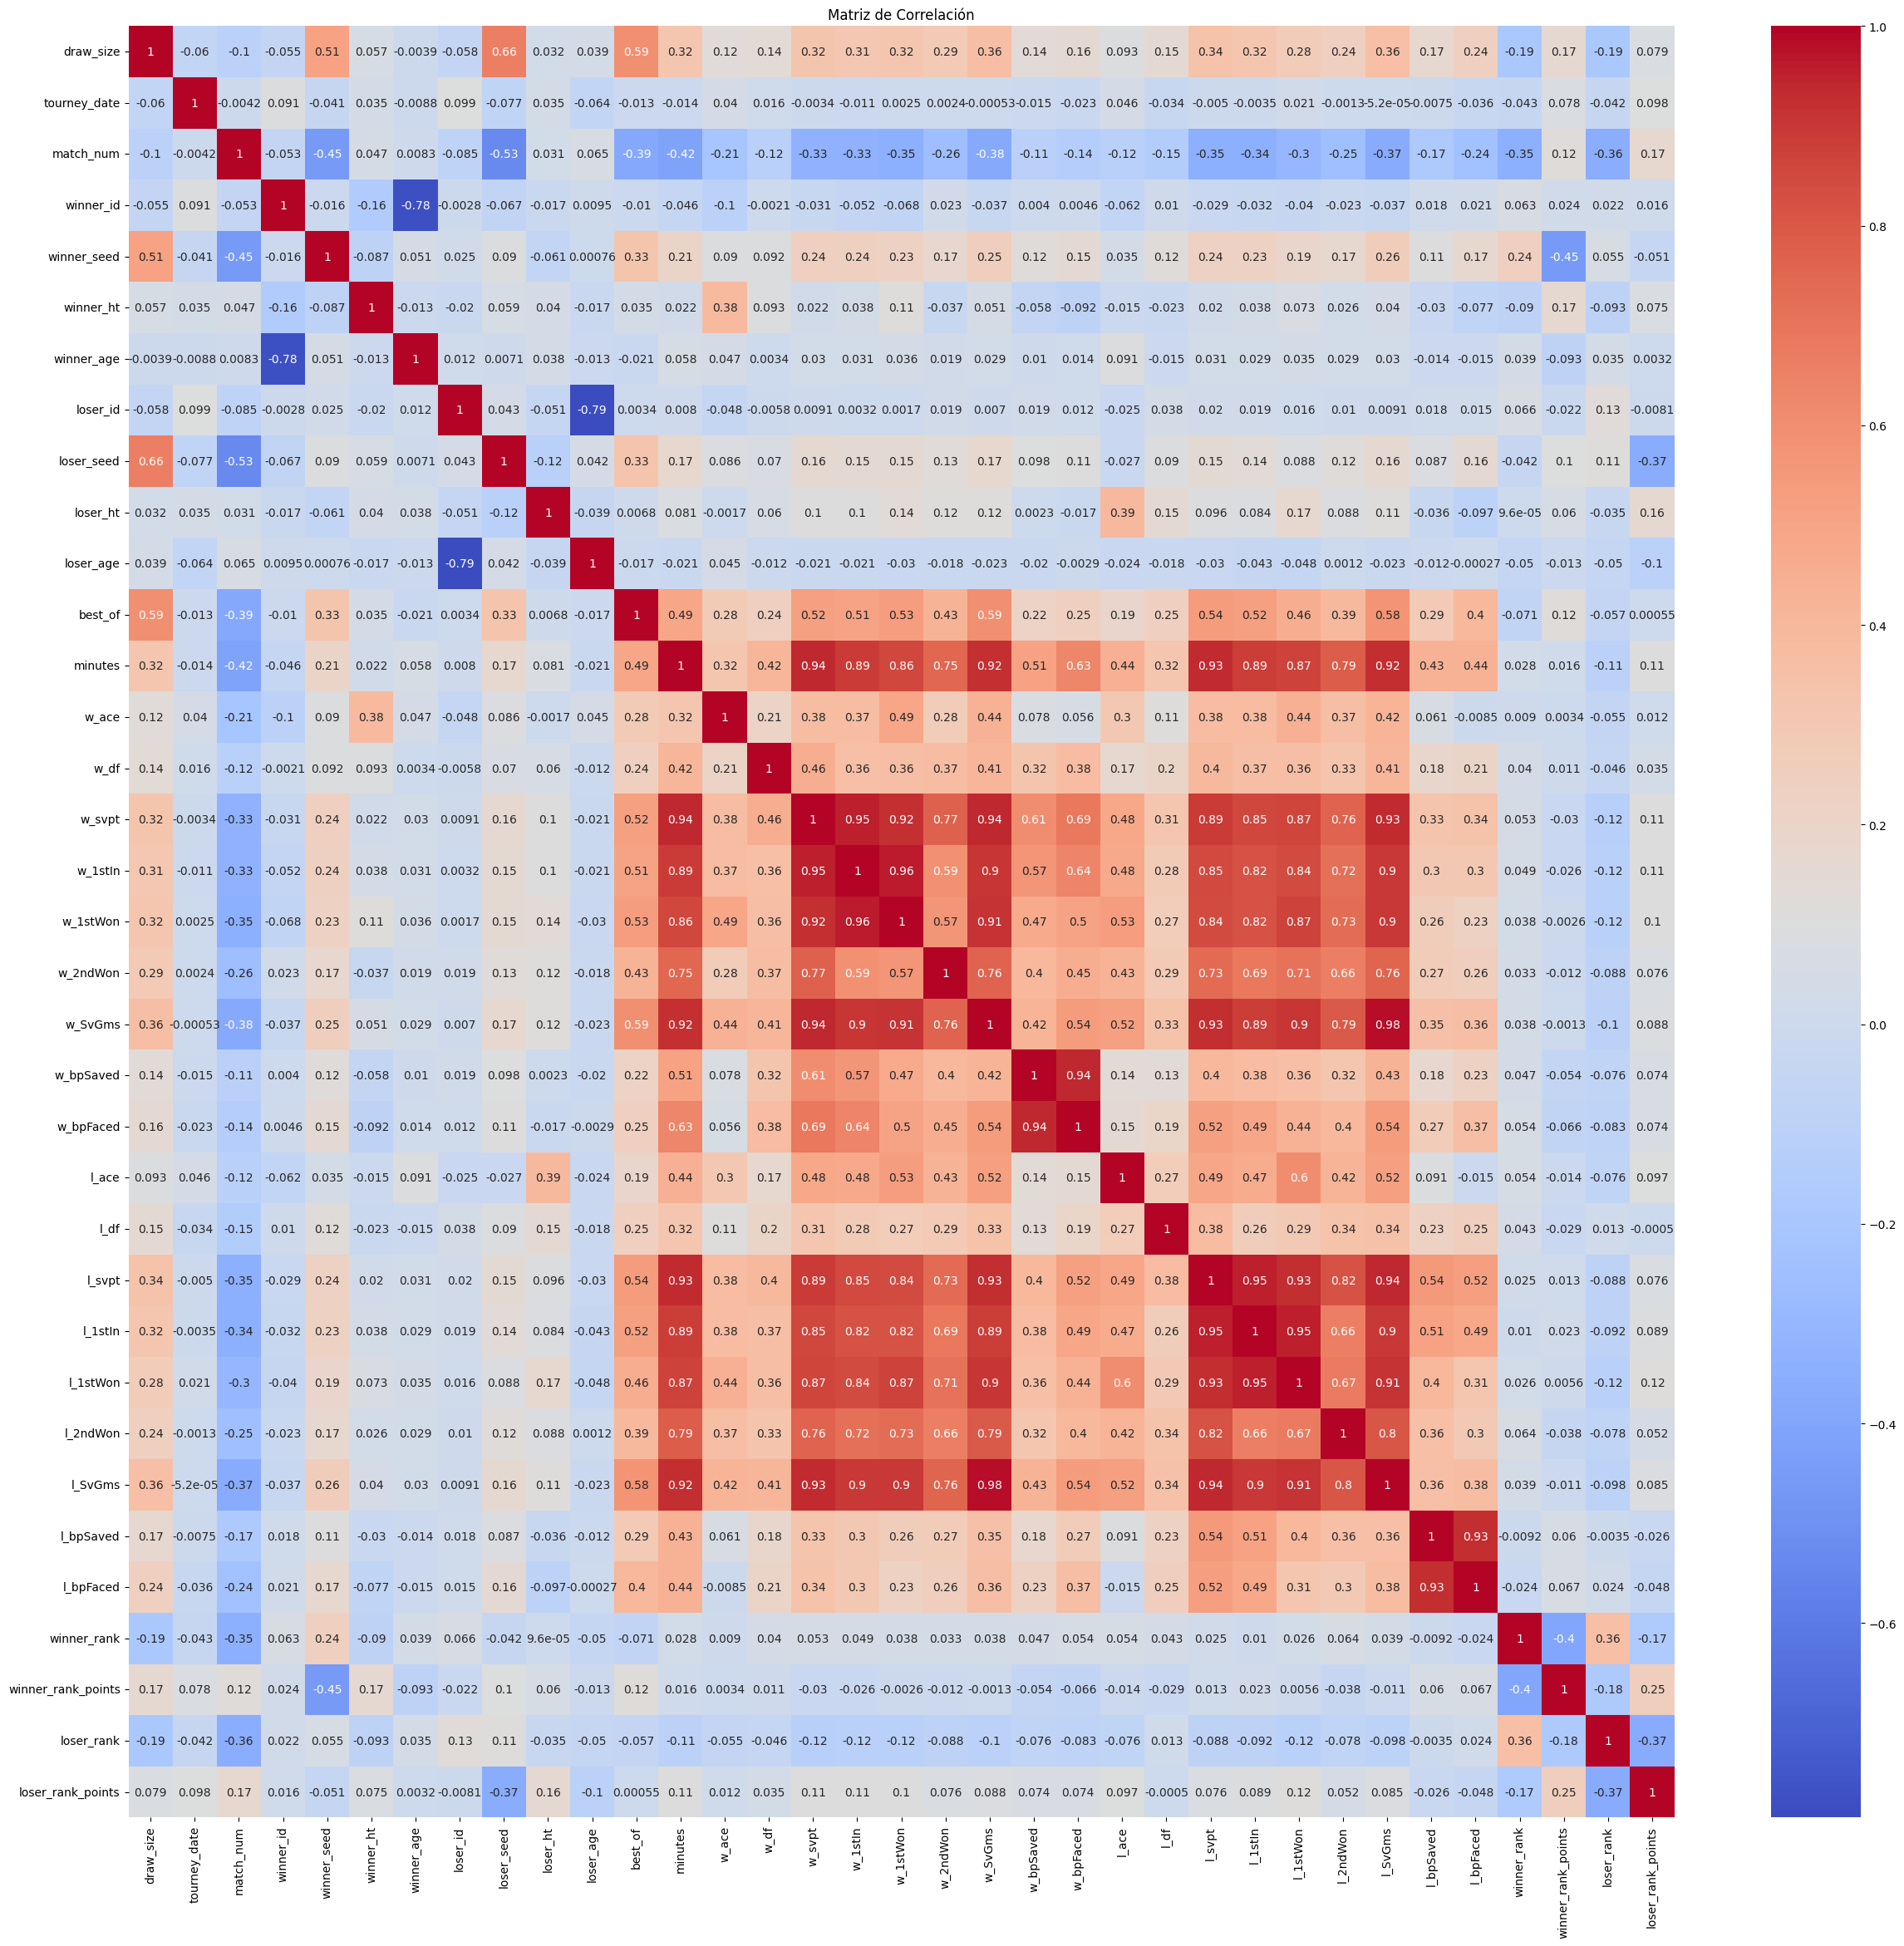

In [7]:
# Matriz de correlación
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(30,28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

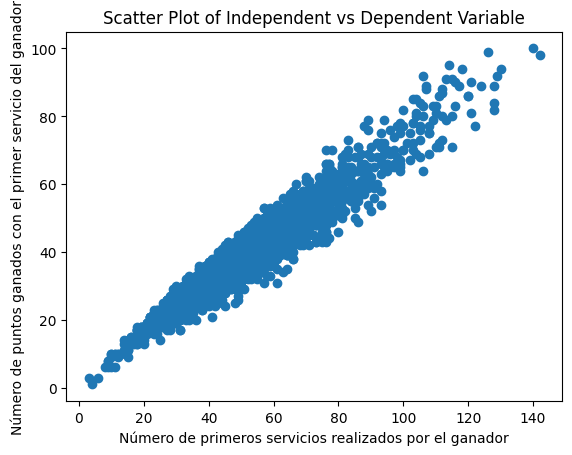

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.formula.api import ols
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cargar el conjunto de datos
df = pd.read_csv('atp_matches_2023.csv')

# Asumiendo que 'w_1stIn' es una variable independiente y 'w_1stWon' es la variable dependiente
X = df[['w_1stIn']]  
y = df['w_1stWon']

# Verificar la linealidad con un gráfico de dispersión
plt.scatter(X, y)
plt.xlabel('Número de primeros servicios realizados por el ganador')
plt.ylabel('Número de puntos ganados con el primer servicio del ganador')
plt.title('Scatter Plot of Independent vs Dependent Variable')
plt.show()


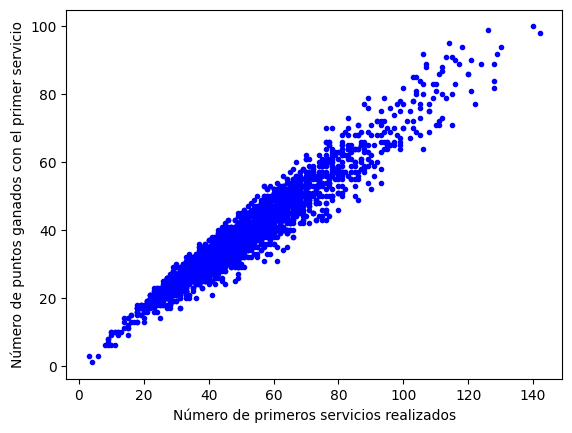

In [9]:
plt.plot(X, y, "b.")
plt.xlabel("Número de primeros servicios realizados")
plt.ylabel("Número de puntos ganados con el primer servicio")
plt.show()

### 4. Modificación del conjunto de datos

In [10]:
import pandas as pd
import numpy as np

data = {'w_1stIn': X.values.flatten(), 'w_1stWon': y.values.flatten()}
df = pd.DataFrame(data)
df.head(10)

,w_1stIn,w_1stWon
0,52.0,45.0
1,19.0,15.0
2,50.0,44.0
3,37.0,31.0
4,52.0,43.0
5,25.0,18.0
6,60.0,45.0
7,30.0,27.0
8,49.0,37.0
9,18.0,17.0


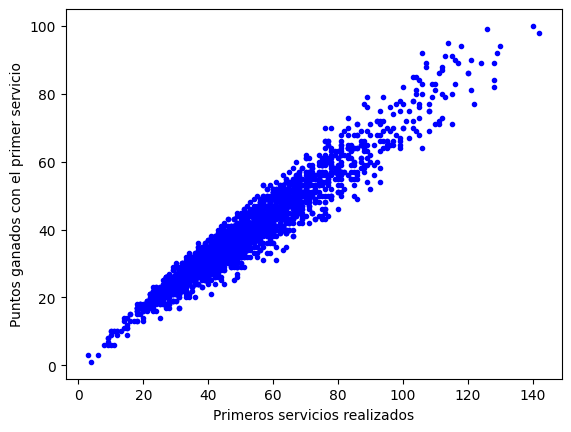

In [11]:
# Representación gráfica del conjunto de datos
plt.plot(df['w_1stIn'], df['w_1stWon'], "b.")
plt.xlabel("Primeros servicios realizados")
plt.ylabel("Puntos ganados con el primer servicio")
plt.show()

### 5. Construcción del modelo

In [12]:
from sklearn.linear_model import LinearRegression

# Eliminar filas con valores faltantes en las columnas 'w_1stIn' y 'w_1stWon'
df_cleaned = df.dropna(subset=['w_1stIn', 'w_1stWon'])

# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df_cleaned['w_1stIn'].values.reshape(-1, 1), df_cleaned['w_1stWon'].values)

LinearRegression()

In [13]:
# Parámetro theta 0
lin_reg.intercept_

3.643311946522637

In [14]:
# Parámetro theta 1
lin_reg.coef_

array([0.68506939])

In [15]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df_cleaned["w_1stIn"].min()], [df_cleaned["w_1stWon"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

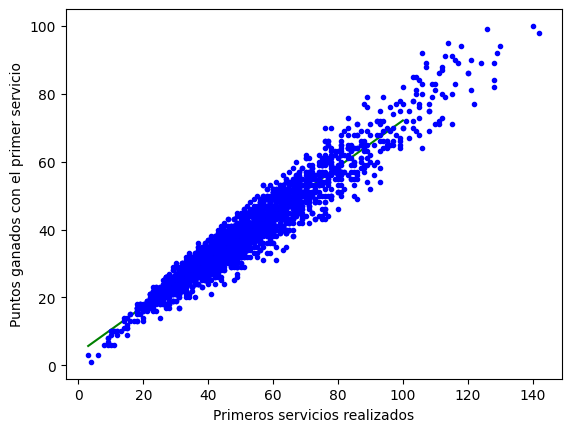

In [16]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df_cleaned['w_1stIn'], df_cleaned['w_1stWon'], "b.")
plt.xlabel("Primeros servicios realizados")
plt.ylabel("Puntos ganados con el primer servicio")
plt.show()

### 6. Predicción de nuevos ejemplos

In [17]:
x_new = np.array([[50]]) # 50 primeros servicios realizados

# Predicción de la puntos obtenidos con el primer servicio
puntos = lin_reg.predict(x_new) 

print("Los puntos ganados con el primer servicio serían:", int(puntos[0]))

Los puntos ganados con el primer servicio serían: 37


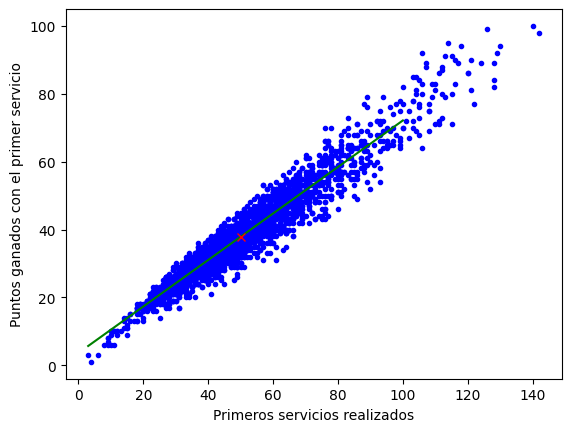

In [18]:
plt.plot(df_cleaned['w_1stIn'], df_cleaned['w_1stWon'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, puntos, "rx")
plt.xlabel("Primeros servicios realizados")
plt.ylabel("Puntos ganados con el primer servicio")
plt.show()